# Features Engineering

Tareas relativas a seleccionar las características (atributos o features) para poder modelar y resolver el caso de uso.

- tareas manuales
- tareas de aprendizaje automático (supervisadas - no supervisadas)

Librerías `sklearn`

- preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html
- feature_selection: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection 
- reducción_dimensiones: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

In [1]:
from google.colab import files
data = files.upload()

Saving outliers.csv to outliers.csv


In [3]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Outliers

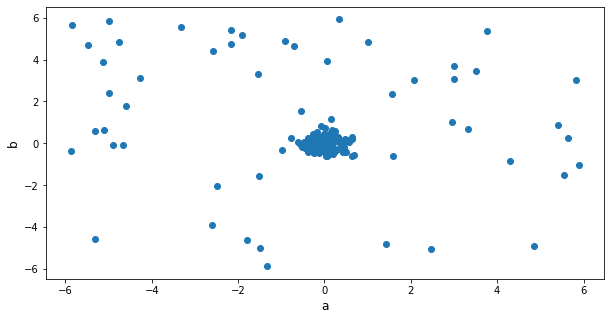

In [4]:
## Cargar dataset
df_outliers= pd.read_csv('outliers.csv')

# Representar dataset
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

In [5]:
#Cargar librerías para utilizar el método de la Envelope
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [6]:
# Aplicar el método EllipticEnvelope
outlier_method = EllipticEnvelope().fit(df_outliers)

scores_pred = outlier_method.decision_function(df_outliers)

# Aplicamos el umbral a partir del cual se encuentran los outliers
thresh = stats.scoreatpercentile(scores_pred, 25) # supongamos que los outliers están al perc. 25

x = outlier_method.predict(df_outliers) # obtenemos el resultado de la predicción -1

# Identificamos los outliers por su índice
idx_outliers = np.where(x==-1)[0]

In [8]:
# Función para aplicar el método Envolvente Elíptica a los datos para detectar los Outliers
def detecion_outliers_m0(df):
  outlier_method = EllipticEnvelope().fit(df)
  scores_pred = outlier_method.decision_function(df)
  x = outlier_method.predict(df) #Los outlieres están donde se predice el valor -1.
  idx_outliers= np.where(x==-1)[0]

  return idx_outliers, df.iloc[idx_outliers,:]

In [9]:
idx_outliers_m0, valores_outliers_m0=detecion_outliers_m0(df_outliers)

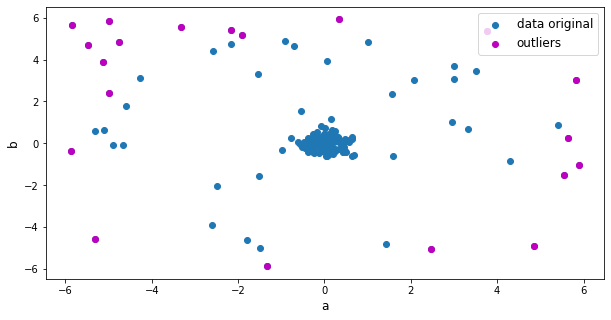

In [10]:
# Representación de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_outliers.a.values,df_outliers.b.values, label='data original')
ax.scatter(df_outliers.a.values[idx_outliers_m0],df_outliers.b.values[idx_outliers_m0],c='m', label='outliers')
plt.legend(fontsize=12)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

## Imputaciones Datos Faltantes

Los métodos utilizados

- Media, Mediana, Moda, IQ
- valores anterior o sucesivo (backfill - forwadfill)
- Media / Media / Moda agrupaciones o clúster (Kmeans)

In [11]:
# Código Interpolate
from scipy.interpolate import interp1d

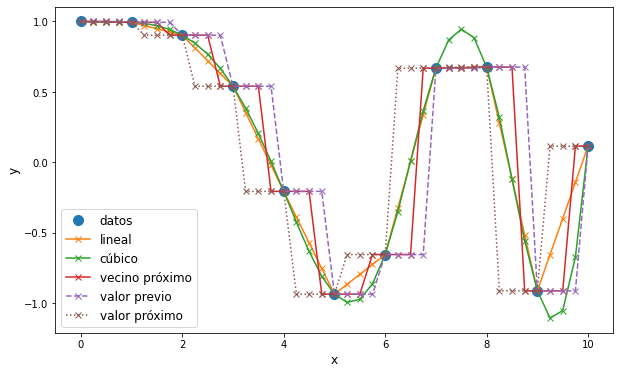

In [12]:
plt.figure(figsize=(10,6))
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

xnew = np.linspace(0, 10, num=41, endpoint=True)


f = interp1d(x, y)
f1 = interp1d(x, y, kind='cubic')
f2 = interp1d(x, y, kind='nearest')
f3 = interp1d(x, y, kind='previous')
f4 = interp1d(x, y, kind='next')

plt.plot(x, y, 'o',ms='10')
plt.plot(xnew, f(xnew),'x-' ,xnew, f1(xnew),'x-')
plt.plot(xnew, f2(xnew), 'x-', xnew, f3(xnew), 'x--', xnew, f4(xnew), 'x:')
plt.legend(['datos', 'lineal', 'cúbico','vecino próximo', 'valor previo', 'valor próximo'], loc='best', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.show()

## Transformaciones y escalado variables numéricas

- Min-Max
- Max Abs
- Estandarización
- Normalización

In [13]:
data = files.upload()

Saving Planetas.csv to Planetas.csv


In [15]:
df_planetas = pd.read_csv('Planetas.csv', sep=',', encoding='latin-1')
df_planetas

,Planeta,Diametro
0,Mercurio,4878
1,Venus,12100
2,Tierra,12756
3,Marte,6787
4,Júpiter,142984
5,Saturno,120536
6,Urano,51108
7,Neptuno,49538


In [17]:
from sklearn.preprocessing import StandardScaler

X = df_planetas['Diametro'].values.reshape(-1,1) # convertimos Series a vector

## Escalado Min- max
from sklearn.preprocessing import MinMaxScaler
X_transf_minmax = MinMaxScaler().fit_transform(X)

## Escalado Max absoluto
from sklearn.preprocessing import MaxAbsScaler
X_transf_maxAbs = MaxAbsScaler().fit_transform(X)

## Estandarización
from sklearn.preprocessing import StandardScaler
X_transf_estand = StandardScaler().fit_transform(X)

##Normalización
from sklearn.preprocessing import normalize
X_transf_norm = normalize(X, norm='l2',axis=0)

In [19]:
df_transform=pd.DataFrame()
df_transform['original']=df_planetas['Diametro'].values
df_transform['min_max']=X_transf_minmax 
df_transform['max_abs']=X_transf_maxAbs
df_transform['Estandarizacion']=X_transf_estand
df_transform['Normalizacion']=X_transf_norm

df_transform

,original,min_max,max_abs,Estandarizacion,Normalizacion
0,4878,0.000000,0.034116,-0.896357,0.024263
1,12100,0.052293,0.084625,-0.753163,0.060186
2,12756,0.057043,0.089213,-0.740156,0.063449
3,6787,0.013823,0.047467,-0.858506,0.033759
4,142984,1.000000,1.000000,1.841933,0.711210
5,120536,0.837458,0.843003,1.396846,0.599553
6,51108,0.334743,0.357439,0.020266,0.254214
7,49538,0.323375,0.346458,-0.010863,0.246405


## Transformación variables categóricas

In [20]:
## Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

X2=df_planetas['Planeta'].values.reshape(-1, 1) 
enc = OrdinalEncoder()
enc.fit(X2)
X2_endod1=enc.transform(X2)

pd.concat([df_planetas, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0
0,Mercurio,4878,2.0
1,Venus,12100,7.0
2,Tierra,12756,5.0
3,Marte,6787,1.0
4,Júpiter,142984,0.0
5,Saturno,120536,4.0
6,Urano,51108,6.0
7,Neptuno,49538,3.0


In [21]:
## One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(drop='first') ##
enc2.fit(X2)
X2_endod1= enc2.transform(X2).toarray()

pd.concat([df_planetas, pd.DataFrame(X2_endod1)], axis=1)

,Planeta,Diametro,0,1,2,3,4,5,6
0,Mercurio,4878,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Venus,12100,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Tierra,12756,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Marte,6787,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Júpiter,142984,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Saturno,120536,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Urano,51108,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,Neptuno,49538,0.0,0.0,1.0,0.0,0.0,0.0,0.0
